## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import math

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [ ]:
x = np.linspace(0,20)
print(x)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


In [ ]:
y = -1 * x + 2
print(y)

[  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -9.83673469
 -10.24489796 -10.65306122 -11.06122449 -11.46938776 -11.87755102
 -12.28571429 -12.69387755 -13.10204082 -13.51020408 -13.91836735
 -14.32653061 -14.73469388 -15.14285714 -15.55102041 -15.95918367
 -16.36734694 -16.7755102  -17.18367347 -17.59183673 -18.        ]


#### Plot your data points. 

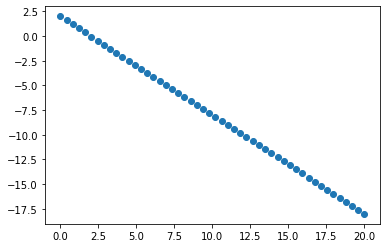

In [ ]:
plt.scatter(x,y)

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

![image.png](attachment:image.png)

In [ ]:
def adagrad(x,y,learning_rate,epsilon,max_iterations):
    
    v_prev0 = 0
    v_prev1 = 0
    theta0 = 0
    theta1 = 0
    m = x.shape[0]
    theta0_list = []
    theta1_list = []
    cost_list = []
    y_predicted_list = []
    y_predicted = theta1 * x + theta0
    error = y_predicted - y
    cost = np.sum(error ** 2) / 2*m 
    for i in range(max_iterations):
        delta_theta0 = np.sum(error) / m
        delta_theta1 = np.sum(error * x) / m
        v_new0 = v_prev0 + (delta_theta0 ** 2)
        v_new1 = v_prev1 + (delta_theta1 ** 2)
        theta0 = theta0 - ((learning_rate / (math.sqrt(v_new0) + epsilon)) * delta_theta0)
        theta1 = theta1 - ((learning_rate / (math.sqrt(v_new1) + epsilon)) * delta_theta1)
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        v_prev0 = v_new0
        v_prev1 = v_new1
        y_predicted = theta1 * x + theta0
        y_predicted_list.append(y_predicted)
        error = y_predicted - y
        cost = np.sum(error ** 2) / 2*m
        cost_list.append(cost)
        
        if i != 0 and abs(cost_list[-1] - cost_list[-2]) <= 0.00001:
            break
    return theta0_list,theta1_list,cost_list,y_predicted_list,theta0_list[-1],theta1_list[-1]

In [ ]:
theta0_list,theta1_list,cost_list,y_predicted_list,optimum_theta0,optimum_theta1 = adagrad(x,y,0.1,10**-8,5000)

In [ ]:
r2_score(y,y_predicted_list[-1])

0.9999982588409985

Text(0.5, 1.0, 'Model cost vs Epochs')

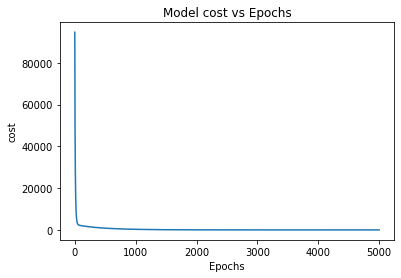

In [ ]:
plt.plot(cost_list)
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.title('Model cost vs Epochs')

Text(0.5, 1.0, 'Model cost vs Theta0')

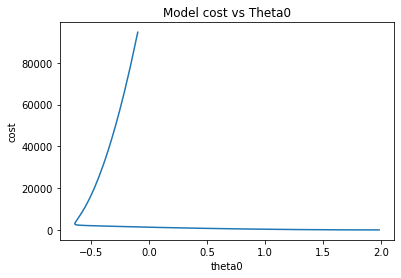

In [ ]:
plt.plot(theta0_list,cost_list)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.title('Model cost vs Theta0')

Text(0.5, 1.0, 'Model cost vs Theta1')

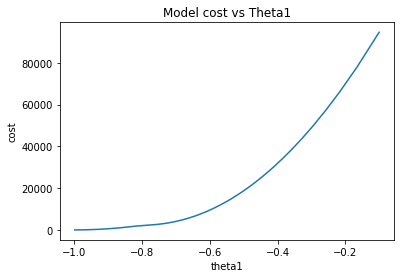

In [ ]:
plt.plot(theta1_list,cost_list)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.title('Model cost vs Theta1')

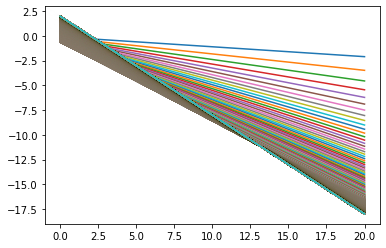

In [ ]:
for i in range(len(y_predicted_list)):
    plt.plot(x,y_predicted_list[i])

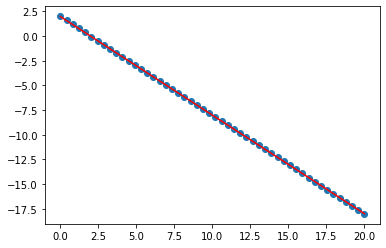

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_predicted_list[-1],'r')

#### Try different values of the huperparameters and see the differnce in your results.

In [ ]:
theta0_list,theta1_list,cost_list,y_predicted_list,optimum_theta0,optimum_theta1 = adagrad(x,y,0.01,10**-8,5000)

In [ ]:
r2_score(y,y_predicted_list[-1]) # the accuracy decreased..the previous learning rate is better

0.9458116163864114

Text(0.5, 1.0, 'Model cost vs Epochs')

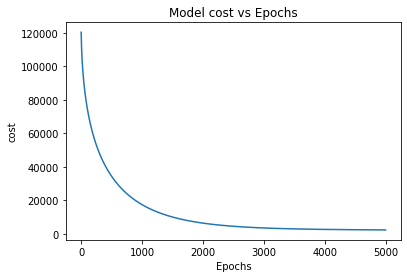

In [ ]:
plt.plot(cost_list)
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.title('Model cost vs Epochs')

Text(0.5, 1.0, 'Model cost vs Theta0')

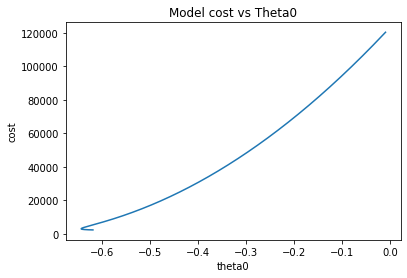

In [ ]:
plt.plot(theta0_list,cost_list)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.title('Model cost vs Theta0')

Text(0.5, 1.0, 'Model cost vs Theta1')

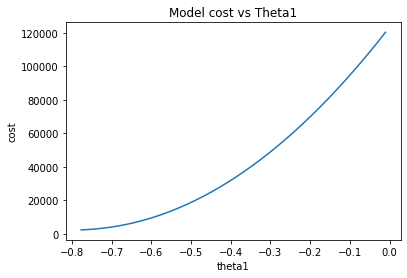

In [ ]:
plt.plot(theta1_list,cost_list)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.title('Model cost vs Theta1')

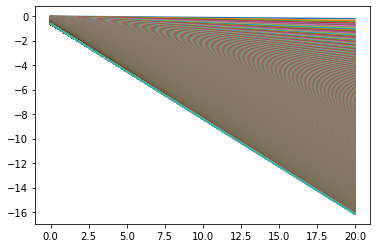

In [ ]:
for i in range(len(y_predicted_list)):
    plt.plot(x,y_predicted_list[i])

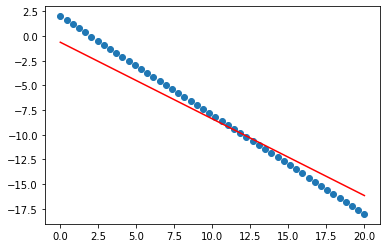

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_predicted_list[-1],'r')

In [ ]:
theta0_list,theta1_list,cost_list,y_predicted_list,optimum_theta0,optimum_theta1 = adagrad(x,y,0.15,10**-8,5000)

In [ ]:
r2_score(y,y_predicted_list[-1]) #better than the learning rate 0.1

0.999999944885714

Text(0.5, 1.0, 'Model cost vs Epochs')

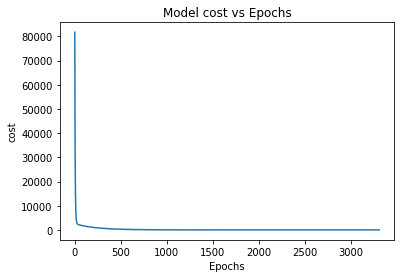

In [ ]:
plt.plot(cost_list)
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.title('Model cost vs Epochs')

Text(0.5, 1.0, 'Model cost vs Theta0')

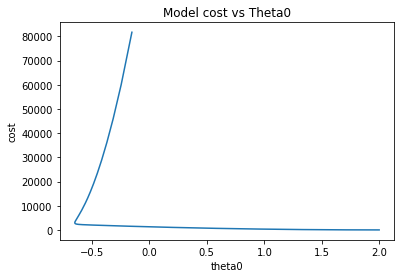

In [ ]:
plt.plot(theta0_list,cost_list)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.title('Model cost vs Theta0')

Text(0.5, 1.0, 'Model cost vs Theta1')

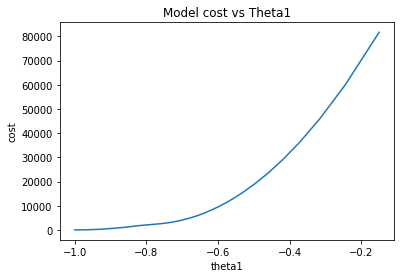

In [ ]:
plt.plot(theta1_list,cost_list)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.title('Model cost vs Theta1')

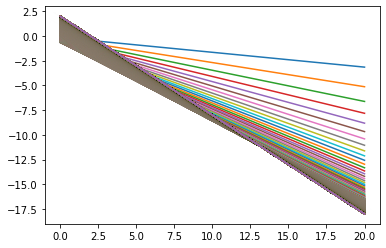

In [ ]:
for i in range(len(y_predicted_list)):
    plt.plot(x,y_predicted_list[i])

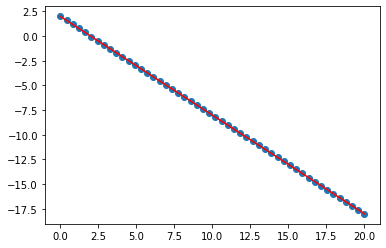

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_predicted_list[-1],'r')

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

![image.png](attachment:image.png)

In [ ]:
def rmsprop(x,y,learning_rate,epsilon,beta,max_iterations):
    
    v_prev0 = 0
    v_prev1 = 0
    theta0 = 0
    theta1 = 0
    m = x.shape[0]
    theta0_list = []
    theta1_list = []
    cost_list = []
    y_predicted_list = []
    y_predicted = theta1 * x + theta0
    error = y_predicted - y
    cost = np.sum(error ** 2) / 2*m 
    for i in range(max_iterations):
        delta_theta0 = np.sum(error) / m
        delta_theta1 = np.sum(error * x) / m
        v_new0 = beta * v_prev0 + (1-beta) * (delta_theta0 ** 2)
        v_new1 = beta * v_prev1 + (1-beta) * (delta_theta1 ** 2)
        theta0 = theta0 - ((learning_rate / (math.sqrt(v_new0) + epsilon)) * delta_theta0)
        theta1 = theta1 - ((learning_rate / (math.sqrt(v_new1) + epsilon)) * delta_theta1)
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        v_prev0 = v_new0
        v_prev1 = v_new1
        y_predicted = theta1 * x + theta0
        y_predicted_list.append(y_predicted)
        error = y_predicted - y
        cost = np.sum(error ** 2) / 2*m
        cost_list.append(cost)
        
        if i != 0 and abs(cost_list[-1] - cost_list[-2]) <= 0.00001:
            break
    return theta0_list,theta1_list,cost_list,y_predicted_list,theta0_list[-1],theta1_list[-1]

In [ ]:
theta0_list,theta1_list,cost_list,y_predicted_list,optimum_theta0,optimum_theta1 = rmsprop(x,y,0.1,10**-8,0.999,5000)

In [ ]:
r2_score(y,y_predicted_list[-1])

0.9999999965370969

Text(0.5, 1.0, 'Model cost vs Epochs')

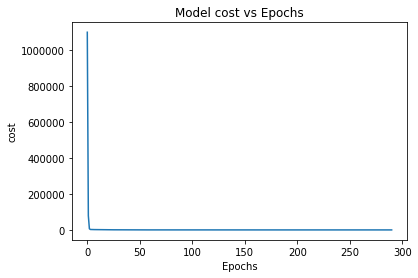

In [ ]:
plt.plot(cost_list)
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.title('Model cost vs Epochs')

Text(0.5, 1.0, 'Model cost vs Theta0')

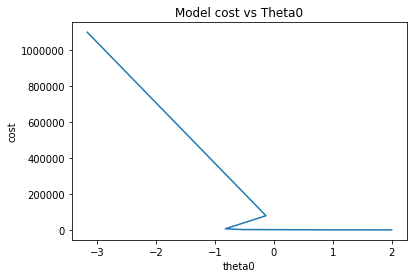

In [ ]:
plt.plot(theta0_list,cost_list)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.title('Model cost vs Theta0')

Text(0.5, 1.0, 'Model cost vs Theta1')

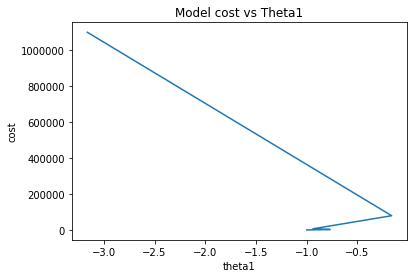

In [ ]:
plt.plot(theta1_list,cost_list)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.title('Model cost vs Theta1')

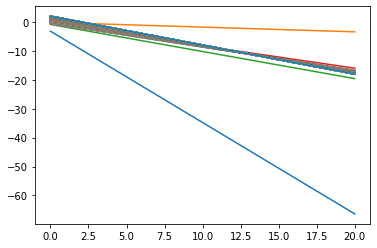

In [ ]:
for i in range(len(y_predicted_list)):
    plt.plot(x,y_predicted_list[i])

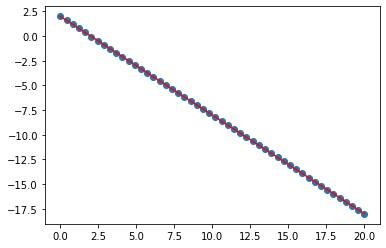

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_predicted_list[-1],'r')

In [ ]:
theta0_list,theta1_list,cost_list,y_predicted_list,optimum_theta0,optimum_theta1 = rmsprop(x,y,0.01,10**-8,0.999,5000)

In [ ]:
r2_score(y,y_predicted_list[-1])

0.9999999895076499

Text(0.5, 1.0, 'Model cost vs Epochs')

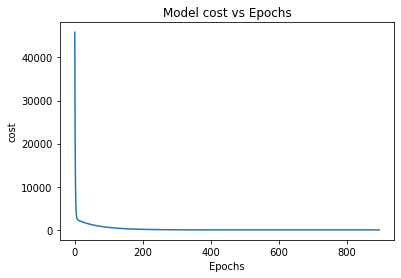

In [ ]:
plt.plot(cost_list)
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.title('Model cost vs Epochs')

Text(0.5, 1.0, 'Model cost vs Theta0')

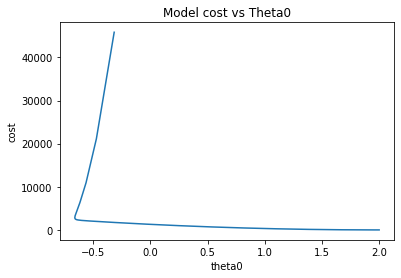

In [ ]:
plt.plot(theta0_list,cost_list)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.title('Model cost vs Theta0')

Text(0.5, 1.0, 'Model cost vs Theta1')

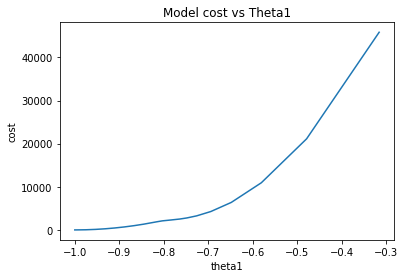

In [ ]:
plt.plot(theta1_list,cost_list)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.title('Model cost vs Theta1')

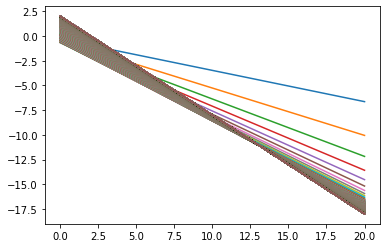

In [ ]:
for i in range(len(y_predicted_list)):
    plt.plot(x,y_predicted_list[i])

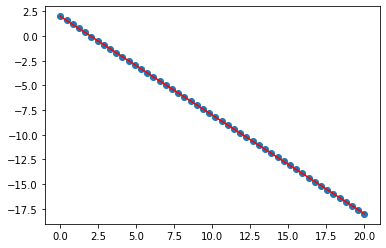

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_predicted_list[-1],'r')

In [ ]:
theta0_list,theta1_list,cost_list,y_predicted_list,optimum_theta0,optimum_theta1 = rmsprop(x,y,0.15,10**-8,0.999,5000)

In [ ]:
r2_score(y,y_predicted_list[-1])

0.9999999964101717

Text(0.5, 1.0, 'Model cost vs Epochs')

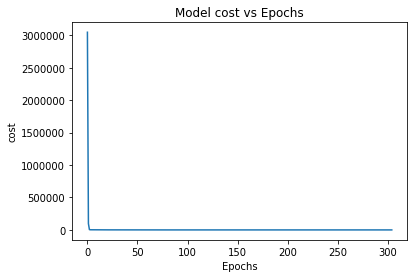

In [ ]:
plt.plot(cost_list)
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.title('Model cost vs Epochs')

Text(0.5, 1.0, 'Model cost vs Theta0')

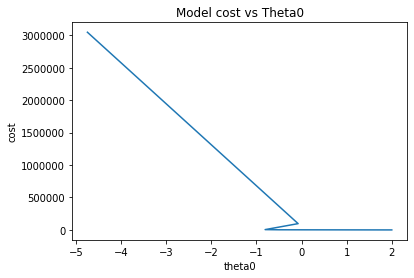

In [ ]:
plt.plot(theta0_list,cost_list)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.title('Model cost vs Theta0')

Text(0.5, 1.0, 'Model cost vs Theta1')

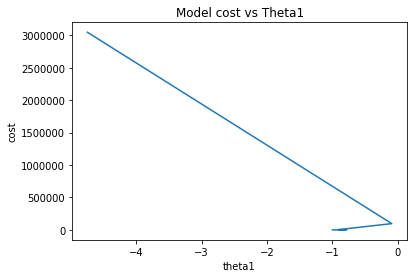

In [ ]:
plt.plot(theta1_list,cost_list)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.title('Model cost vs Theta1')

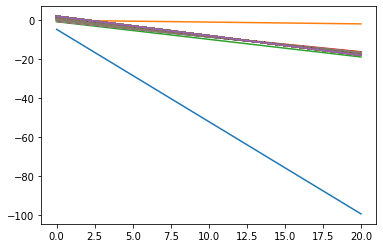

In [ ]:
for i in range(len(y_predicted_list)):
    plt.plot(x,y_predicted_list[i])

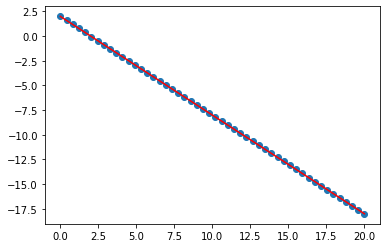

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_predicted_list[-1],'r')

In [ ]:
theta0_list,theta1_list,cost_list,y_predicted_list,optimum_theta0,optimum_theta1 = rmsprop(x,y,0.15,10**-8,0.5,5000)

In [ ]:
r2_score(y,y_predicted_list[-1])

0.974756981771601

Text(0.5, 1.0, 'Model cost vs Epochs')

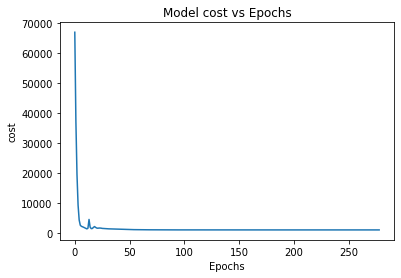

In [ ]:
plt.plot(cost_list)
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.title('Model cost vs Epochs')

Text(0.5, 1.0, 'Model cost vs Theta0')

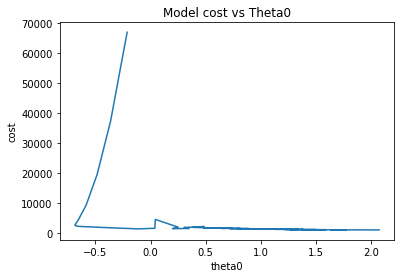

In [ ]:
plt.plot(theta0_list,cost_list)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.title('Model cost vs Theta0')

Text(0.5, 1.0, 'Model cost vs Theta1')

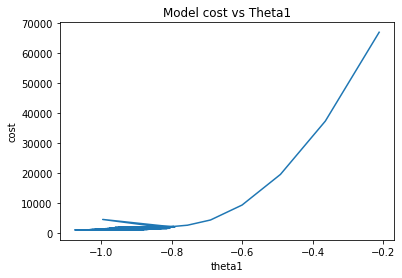

In [ ]:
plt.plot(theta1_list,cost_list)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.title('Model cost vs Theta1')

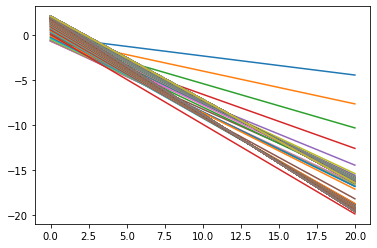

In [ ]:
for i in range(len(y_predicted_list)):
    plt.plot(x,y_predicted_list[i])

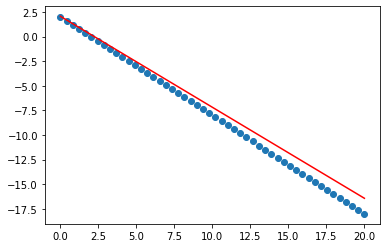

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_predicted_list[-1],'r')

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

![image-4.png](attachment:image-4.png)

In [ ]:
def adam(x,y,learning_rate,epsilon,beta1,beta2,max_iterations): 
    v_prev0 = 0
    v_prev1 = 0
    m_prev0 = 0
    m_prev1 = 0 
    theta0 = 0
    theta1 = 0  
    m = x.shape[0]
    theta0_list = []
    theta1_list = []
    cost_list = []
    y_predicted_list = []
    
    y_predicted = theta1 * x + theta0
    error = y_predicted - y
    cost = np.sum(error ** 2) / 2*m 
    for i in range(max_iterations):
        
        delta_theta0 = np.sum(error) / m
        delta_theta1 = np.sum(error * x) / m
        
        m_bias_correction = 1-  (beta1 ** (i+1))
        v_bias_correction = 1 - (beta2 ** (i+1))
        
        m_new_theta0 = ((beta1 * m_prev0) + ((1- beta1) * delta_theta0)) 
        m_corrected0 = m_new_theta0 / m_bias_correction
        
        m_new_theta1 = ((beta1 * m_prev1) + ((1- beta1) * delta_theta1))
        m_corrected1 = m_new_theta1 / m_bias_correction
        
        v_new0 = (beta2 * v_prev0 + (1-beta2) * (delta_theta0 ** 2)) 
        v_corrected0 = v_new0 / v_bias_correction
        
        v_new1 = (beta2 * v_prev1 + (1-beta2) * (delta_theta1 ** 2)) 
        v_corrected1 = v_new1 / v_bias_correction
        
        theta0 = theta0 - ((learning_rate / (math.sqrt(v_corrected0) + epsilon)) *  m_corrected0)
        theta1 = theta1 - ((learning_rate / (math.sqrt(v_corrected1) + epsilon)) *  m_corrected1)
        theta0_list.append(theta0)
        theta1_list.append(theta1)
        
        v_prev0 = v_new0
        v_prev1 = v_new1
        m_prev0 = m_new_theta0
        m_prev1 = m_new_theta1
        
        y_predicted = theta1 * x + theta0
        y_predicted_list.append(y_predicted)
        error = y_predicted - y
        cost = np.sum(error ** 2) / 2*m
        cost_list.append(cost)
        
        if i != 0 and abs(cost_list[-1] - cost_list[-2]) <= 0.00001:
            break
    return theta0_list,theta1_list,cost_list,y_predicted_list,theta0_list[-1],theta1_list[-1]

In [ ]:
theta0_list,theta1_list,cost_list,y_predicted_list,optimum_theta0,optimum_theta1 = adam(x,y,0.1,10**-8,0.9,0.999,5000)

In [ ]:
r2_score(y,y_predicted_list[-1])

0.9999999978171773

Text(0.5, 1.0, 'Model cost vs Epochs')

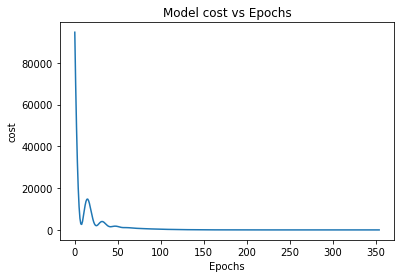

In [ ]:
plt.plot(cost_list)
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.title('Model cost vs Epochs')

Text(0.5, 1.0, 'Model cost vs Theta0')

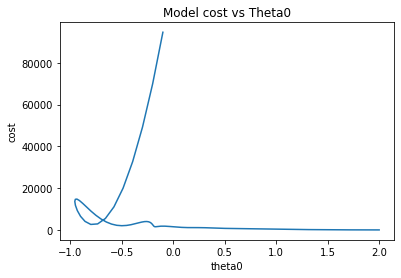

In [ ]:
plt.plot(theta0_list,cost_list)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.title('Model cost vs Theta0')

Text(0.5, 1.0, 'Model cost vs Theta1')

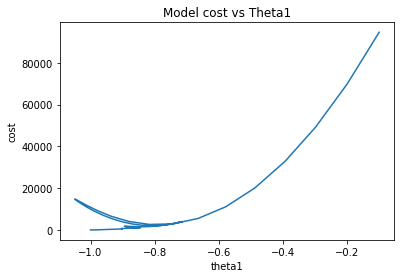

In [ ]:
plt.plot(theta1_list,cost_list)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.title('Model cost vs Theta1')

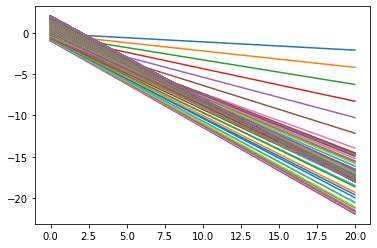

In [ ]:
for i in range(len(y_predicted_list)):
    plt.plot(x,y_predicted_list[i])

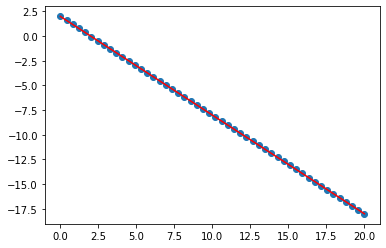

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_predicted_list[-1],'r')

In [ ]:
theta0_list,theta1_list,cost_list,y_predicted_list,optimum_theta0,optimum_theta1 = adam(x,y,0.01,10**-8,0.9,0.999,5000)

In [ ]:
r2_score(y,y_predicted_list[-1])

0.9999999812816439

Text(0.5, 1.0, 'Model cost vs Epochs')

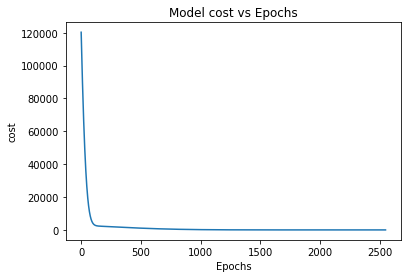

In [ ]:
plt.plot(cost_list)
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.title('Model cost vs Epochs')

Text(0.5, 1.0, 'Model cost vs Theta0')

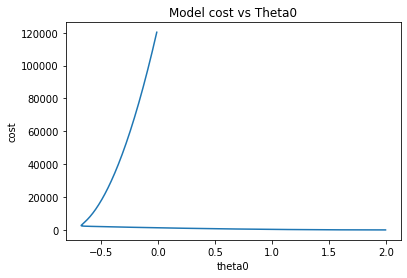

In [ ]:
plt.plot(theta0_list,cost_list)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.title('Model cost vs Theta0')

Text(0.5, 1.0, 'Model cost vs Theta1')

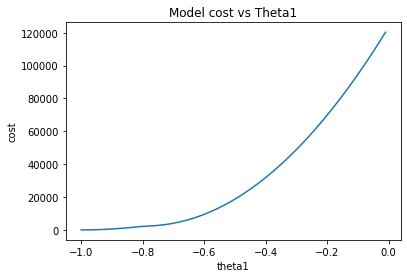

In [ ]:
plt.plot(theta1_list,cost_list)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.title('Model cost vs Theta1')

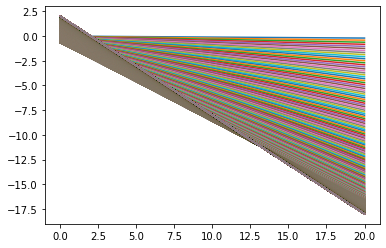

In [ ]:
for i in range(len(y_predicted_list)):
    plt.plot(x,y_predicted_list[i])

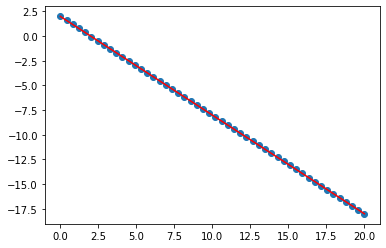

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_predicted_list[-1],'r')

In [ ]:
theta0_list,theta1_list,cost_list,y_predicted_list,optimum_theta0,optimum_theta1 = adam(x,y,0.15,10**-8,0.9,0.999,5000)

In [ ]:
r2_score(y,y_predicted_list[-1])

0.9999999995954835

Text(0.5, 1.0, 'Model cost vs Epochs')

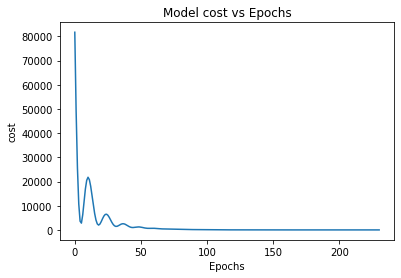

In [ ]:
plt.plot(cost_list)
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.title('Model cost vs Epochs')

Text(0.5, 1.0, 'Model cost vs Theta0')

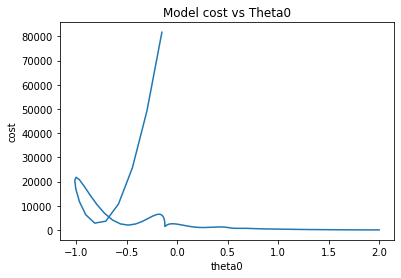

In [ ]:
plt.plot(theta0_list,cost_list)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.title('Model cost vs Theta0')

Text(0.5, 1.0, 'Model cost vs Theta1')

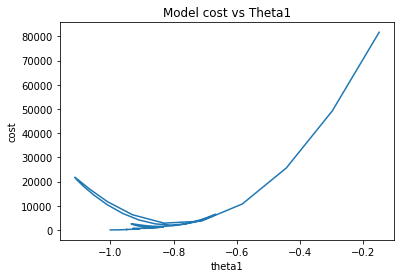

In [ ]:
plt.plot(theta1_list,cost_list)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.title('Model cost vs Theta1')

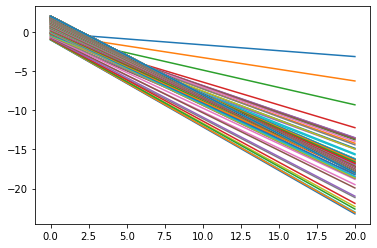

In [ ]:
for i in range(len(y_predicted_list)):
    plt.plot(x,y_predicted_list[i])

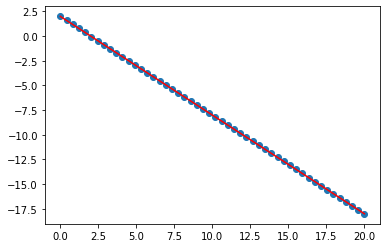

In [ ]:
plt.scatter(x,y)
plt.plot(x,y_predicted_list[-1],'r')

## Congratulations 
![image.png](attachment:image.png)

### Compare the loss with learning rate = 0.15 
### As shown the Adam converges in only 231 epochs and thus faster than rmsprop and adagrad 

In [ ]:
theta0_list,theta1_list,cost_list,y_predicted_list,optimum_theta0,optimum_theta1 = adagrad(x,y,0.15,10**-8,5000)

3305


Text(0.5, 1.0, 'Model cost vs Epochs')

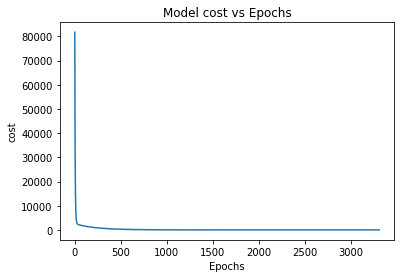

In [ ]:
print(len(cost_list))
plt.plot(cost_list)
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.title('Model cost vs Epochs')

In [ ]:
theta0_list,theta1_list,cost_list,y_predicted_list,optimum_theta0,optimum_theta1 = rmsprop(x,y,0.15,10**-8,0.5,5000)

279


Text(0.5, 1.0, 'Model cost vs Epochs')

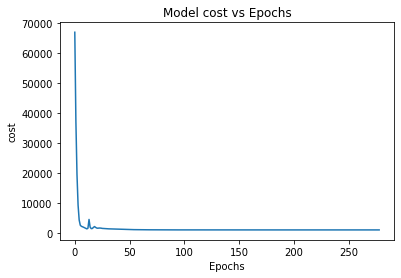

In [ ]:
print(len(cost_list))
plt.plot(cost_list)
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.title('Model cost vs Epochs')

In [ ]:
theta0_list,theta1_list,cost_list,y_predicted_list,optimum_theta0,optimum_theta1 = adam(x,y,0.15,10**-8,0.9,0.999,5000)

231


Text(0.5, 1.0, 'Model cost vs Epochs')

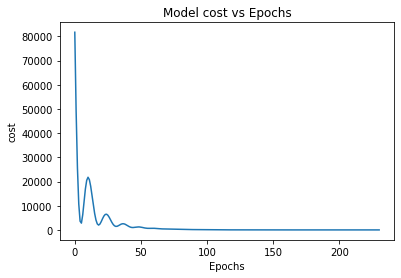

In [ ]:
print(len(cost_list))
plt.plot(cost_list)
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.title('Model cost vs Epochs')

### Compare the r2 score with learning rate = 0.15 
### As shown the Adam converges achieves the highest accuracy

In [ ]:
theta0_list,theta1_list,cost_list,y_predicted_list,optimum_theta0,optimum_theta1 = adagrad(x,y,0.15,10**-8,5000)

In [ ]:
r2_score(y,y_predicted_list[-1])

0.999999944885714

In [ ]:
theta0_list,theta1_list,cost_list,y_predicted_list,optimum_theta0,optimum_theta1 = rmsprop(x,y,0.15,10**-8,0.5,5000)

In [ ]:
r2_score(y,y_predicted_list[-1])

0.974756981771601

In [ ]:
theta0_list,theta1_list,cost_list,y_predicted_list,optimum_theta0,optimum_theta1 = adam(x,y,0.15,10**-8,0.9,0.999,5000)

In [ ]:
r2_score(y,y_predicted_list[-1])

0.9999999995954835

### Compare the loss vs theta0 with learning rate = 0.15 

In [ ]:
theta0_list,theta1_list,cost_list,y_predicted_list,optimum_theta0,optimum_theta1 = adagrad(x,y,0.15,10**-8,5000)

Text(0.5, 1.0, 'Model cost vs Theta0')

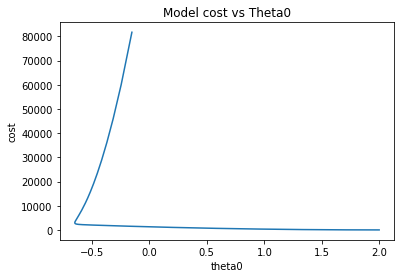

In [ ]:
plt.plot(theta0_list,cost_list)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.title('Model cost vs Theta0')

In [ ]:
theta0_list,theta1_list,cost_list,y_predicted_list,optimum_theta0,optimum_theta1 = rmsprop(x,y,0.15,10**-8,0.5,5000)

Text(0.5, 1.0, 'Model cost vs Theta0')

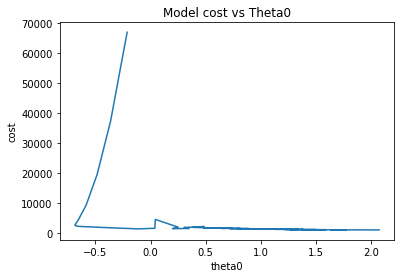

In [ ]:
plt.plot(theta0_list,cost_list)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.title('Model cost vs Theta0')

In [ ]:
theta0_list,theta1_list,cost_list,y_predicted_list,optimum_theta0,optimum_theta1 = adam(x,y,0.15,10**-8,0.9,0.999,5000)

Text(0.5, 1.0, 'Model cost vs Theta0')

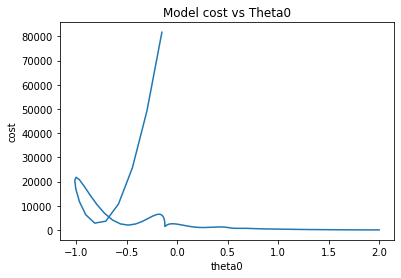

In [ ]:
plt.plot(theta0_list,cost_list)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.title('Model cost vs Theta0')

### Compare the loss vs theta1 with learning rate = 0.15 

In [ ]:
theta0_list,theta1_list,cost_list,y_predicted_list,optimum_theta0,optimum_theta1 = adagrad(x,y,0.15,10**-8,5000)

Text(0.5, 1.0, 'Model cost vs Theta1')

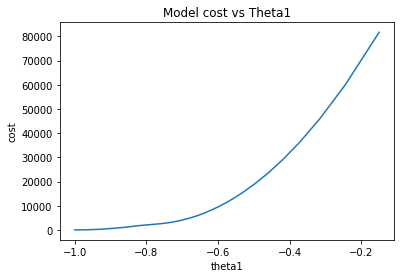

In [ ]:
plt.plot(theta1_list,cost_list)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.title('Model cost vs Theta1')

In [ ]:
theta0_list,theta1_list,cost_list,y_predicted_list,optimum_theta0,optimum_theta1 = rmsprop(x,y,0.15,10**-8,0.5,5000)

Text(0.5, 1.0, 'Model cost vs Theta1')

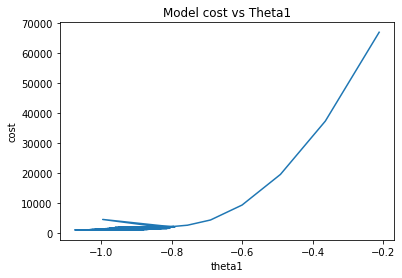

In [ ]:
plt.plot(theta1_list,cost_list)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.title('Model cost vs Theta1')

In [ ]:
theta0_list,theta1_list,cost_list,y_predicted_list,optimum_theta0,optimum_theta1 = adam(x,y,0.15,10**-8,0.9,0.999,5000)

Text(0.5, 1.0, 'Model cost vs Theta1')

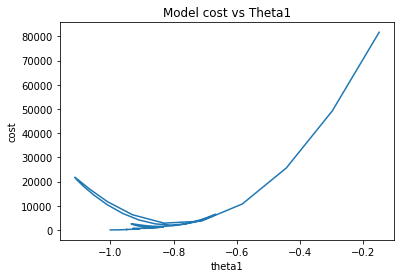

In [ ]:
plt.plot(theta1_list,cost_list)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.title('Model cost vs Theta1')